In [1]:
# Import libraries need for Linear Regression Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('avocado.csv')

In [3]:
dt

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
# getting Top 10 recordes in the dataset
dt.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
# getting Bottom 10 recordes in the dataset
dt.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
# Display the shape of the dataset
print ('The shape of the dataset is', dt.shape)

The shape of the dataset is (18249, 14)


In [7]:
# Dataframe columns
dt.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column Unnamed: 0 has [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52] unique elements
****************************************************************************************************
This column Date has ['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11

In [10]:
# To find nunique elements
dt.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [11]:
# To find NAN values in the dataset
dt.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
# To find the correlection in the dataset
dt.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


<AxesSubplot:>

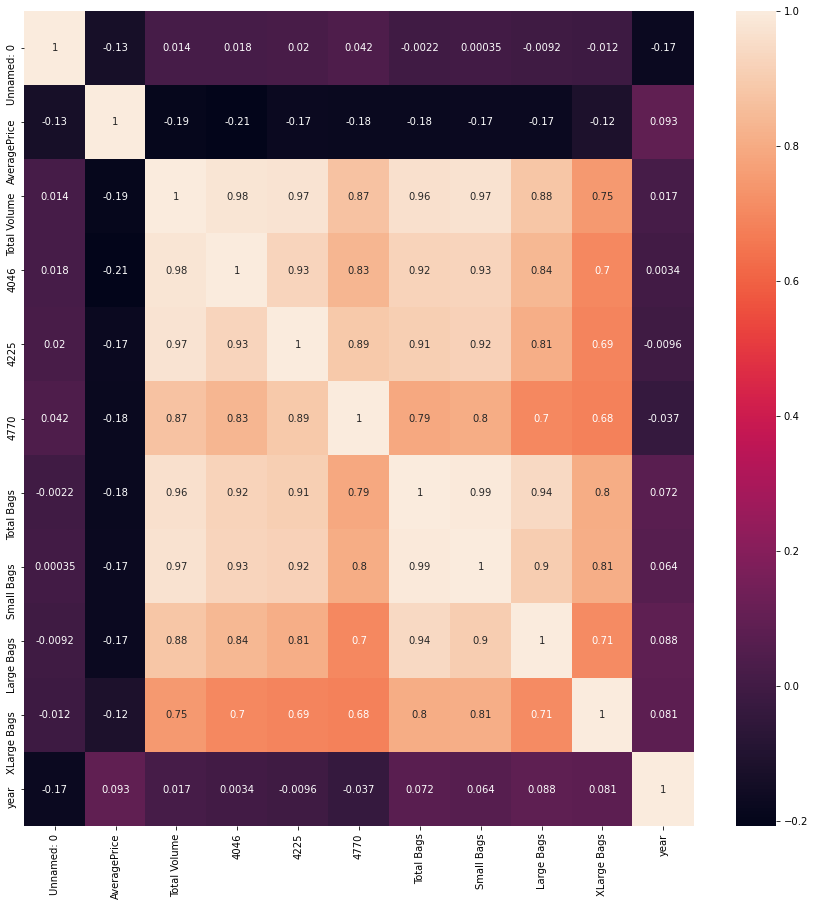

In [13]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [14]:
# Survived corr has been hilighted
e['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
Unnamed: 0     -0.133008
XLarge Bags    -0.117592
year            0.093197
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [15]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


<AxesSubplot:>

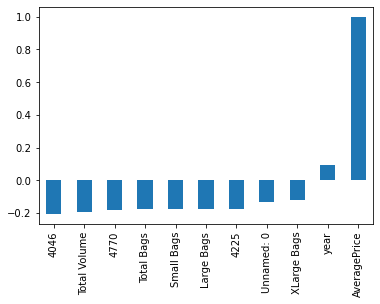

In [16]:
e['AveragePrice'].sort_values().plot(kind='bar')

In [14]:
dt['Date']=pd.to_datetime(dt['Date'])
dt['Month']=dt['Date'].apply(lambda x:x.month)

In [15]:
dt.drop(columns=['Date'], inplace=True)

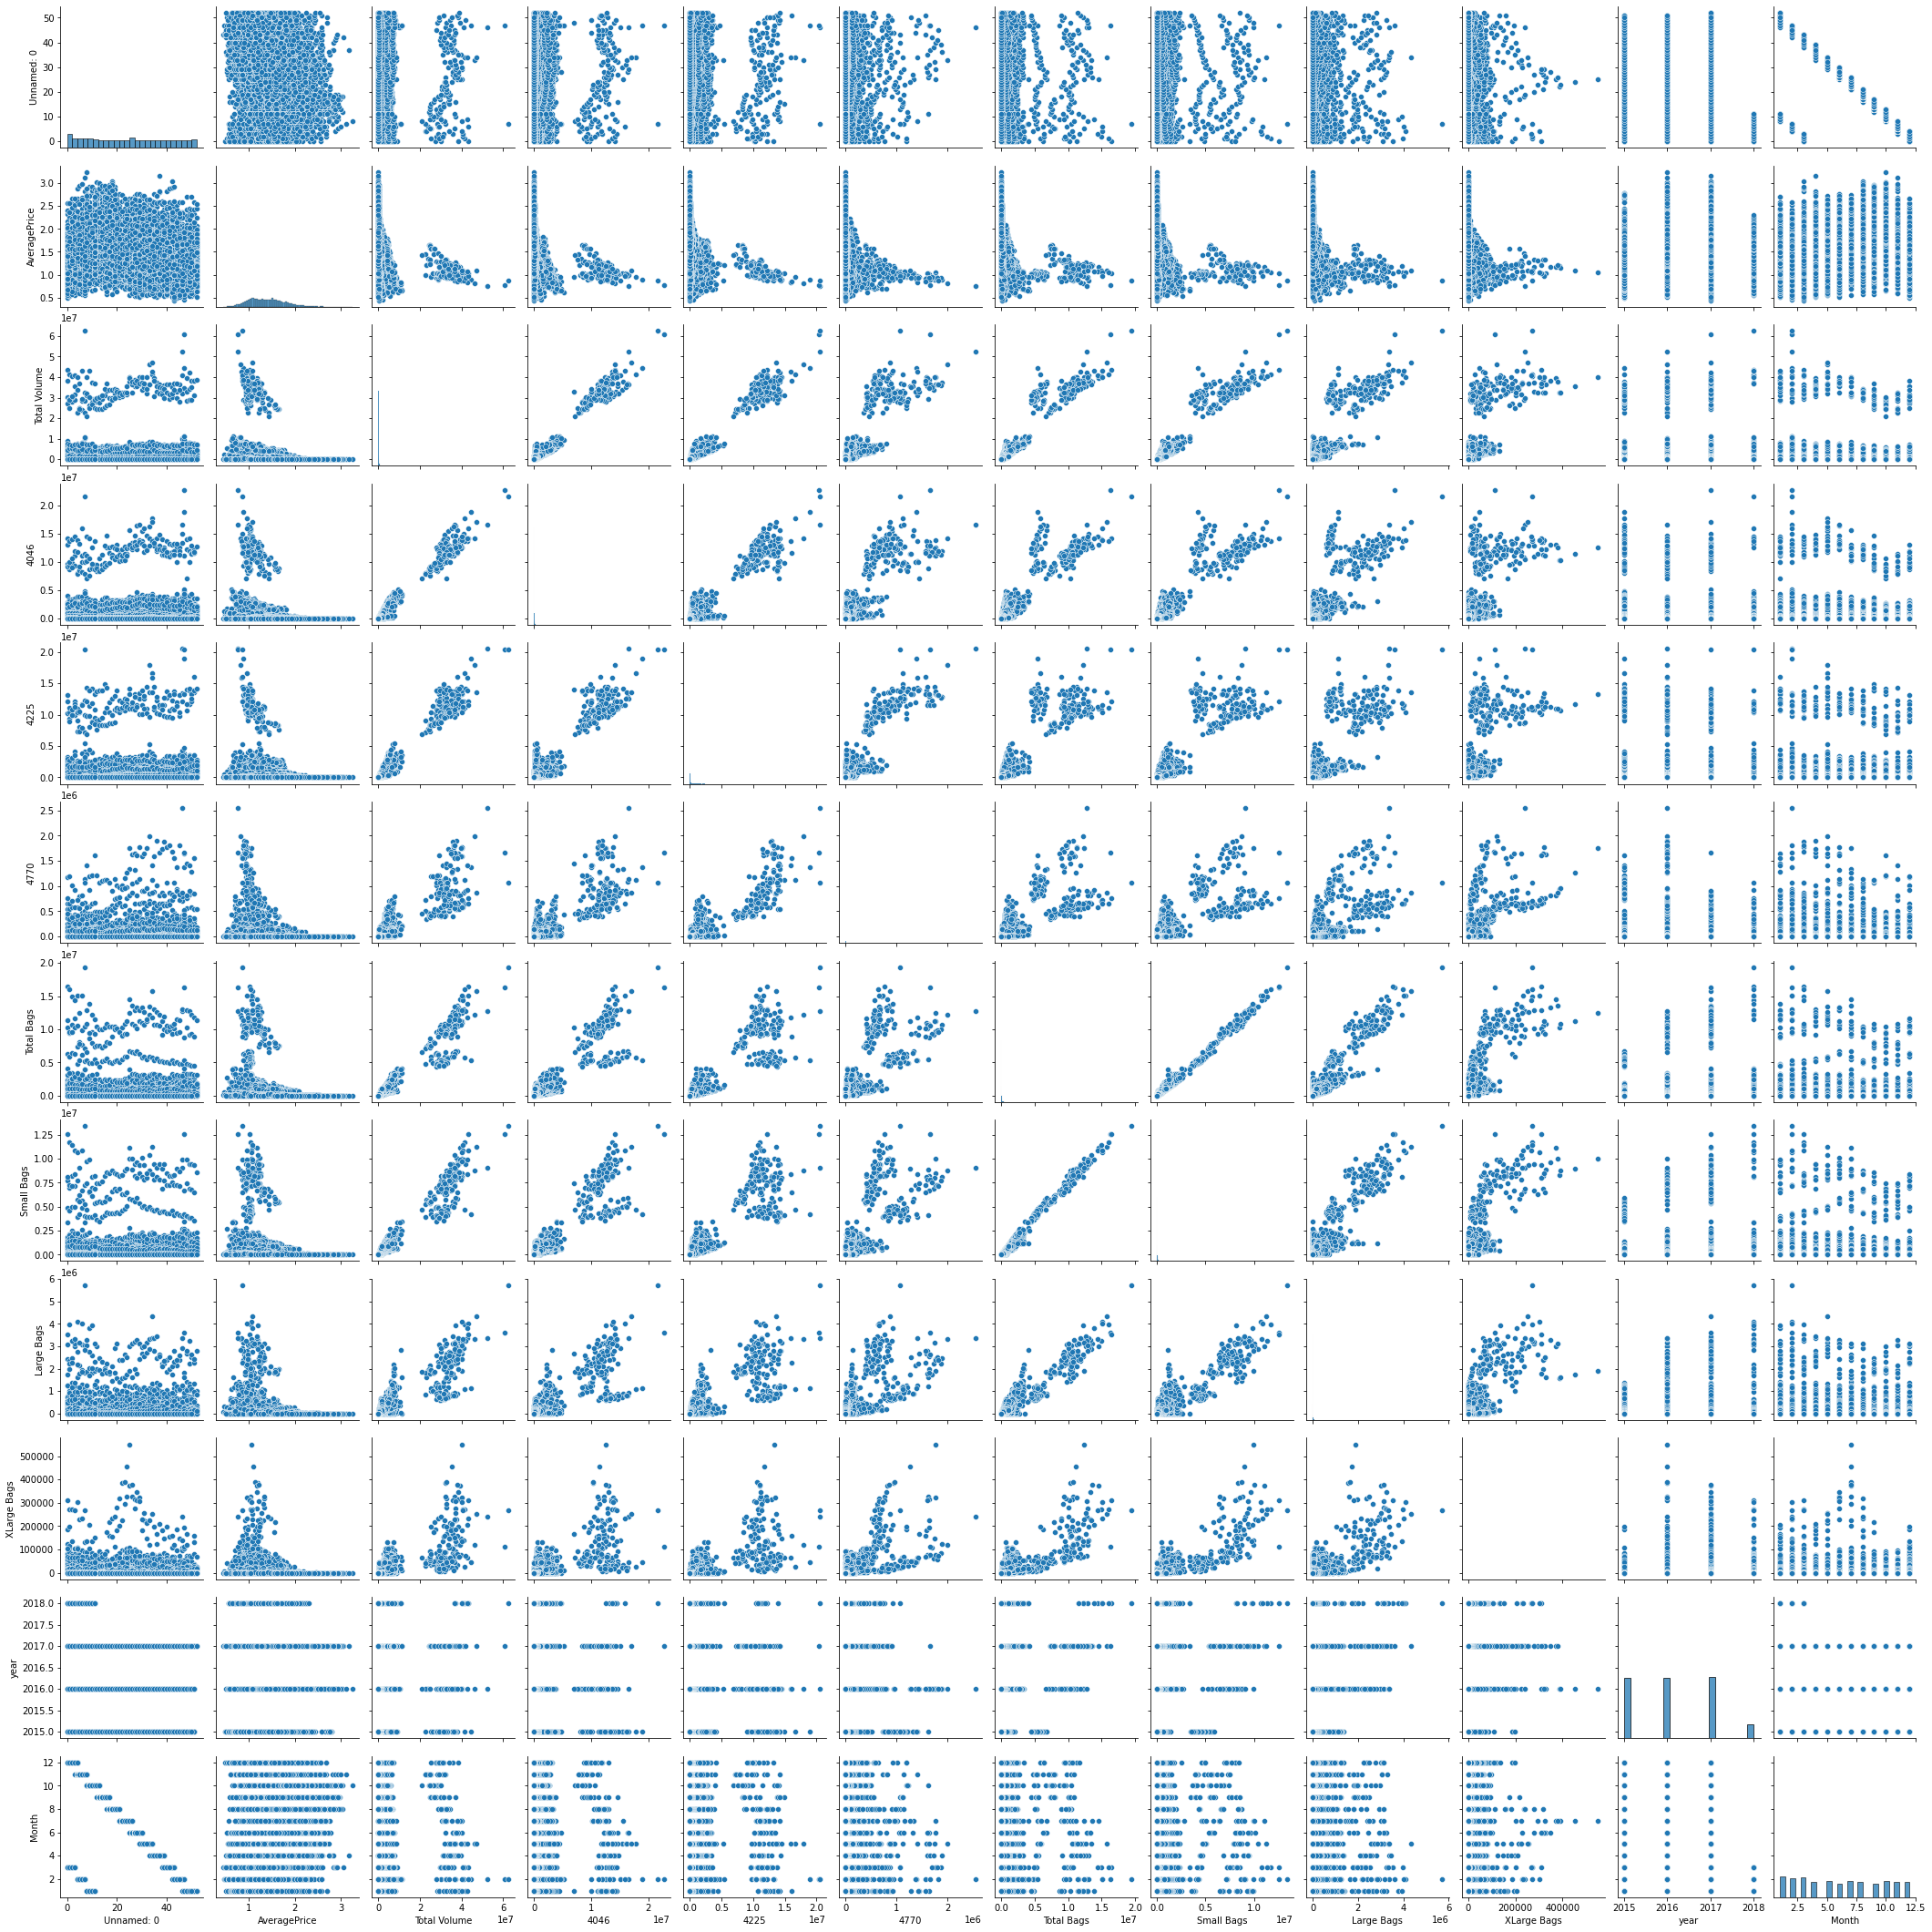

In [19]:
sns.pairplot(dt)

In [20]:
dt.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667,-0.777730
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969


<AxesSubplot:>

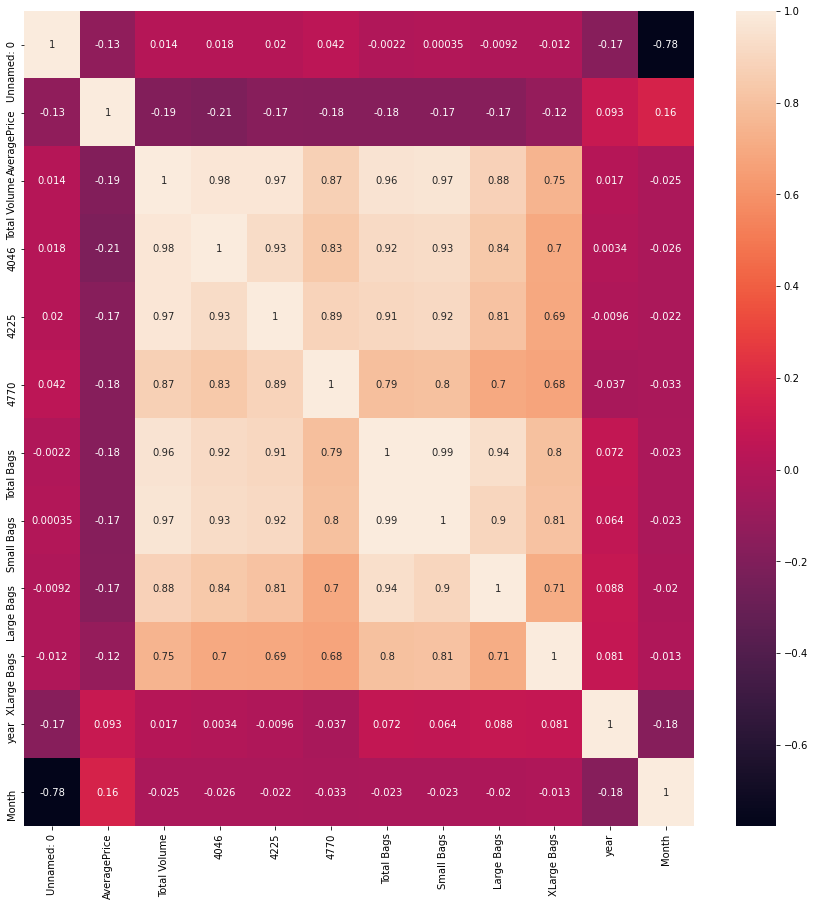

In [21]:
g=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(g,annot=True)

<AxesSubplot:xlabel='type', ylabel='count'>

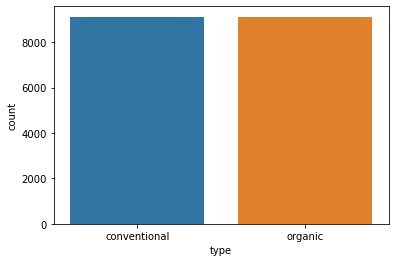

In [22]:
sns.countplot(dt['type'])

<AxesSubplot:xlabel='year', ylabel='count'>

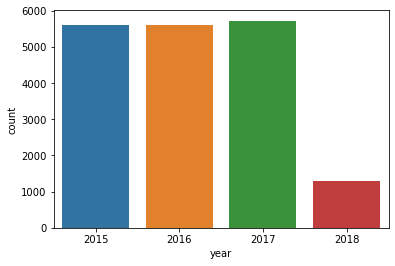

In [23]:
sns.countplot(dt['year'])

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

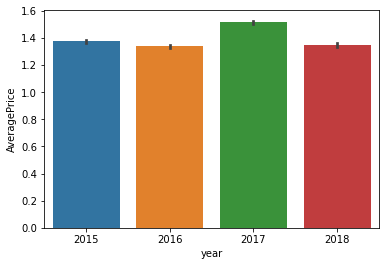

In [24]:
sns.barplot(data=dt, x="year", y="AveragePrice")

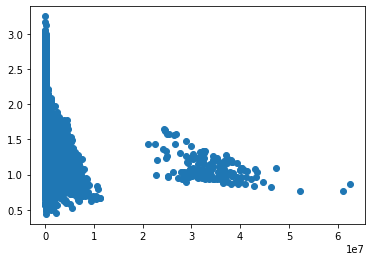

In [25]:
plt.scatter(dt['Total Volume'],dt['AveragePrice'])

<AxesSubplot:xlabel='year'>

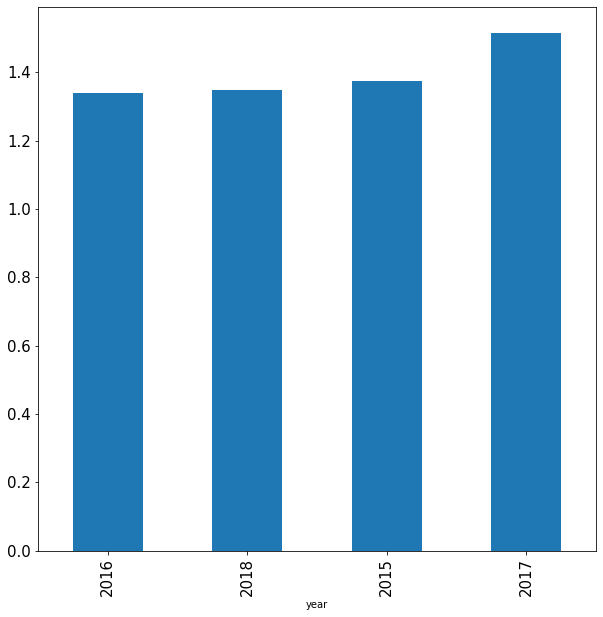

In [26]:
((dt.groupby('year')['AveragePrice'].mean()).sort_values(ascending=True)).plot(kind='bar', figsize=(10,10),fontsize=15)

In [27]:
dt.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

<AxesSubplot:xlabel='region'>

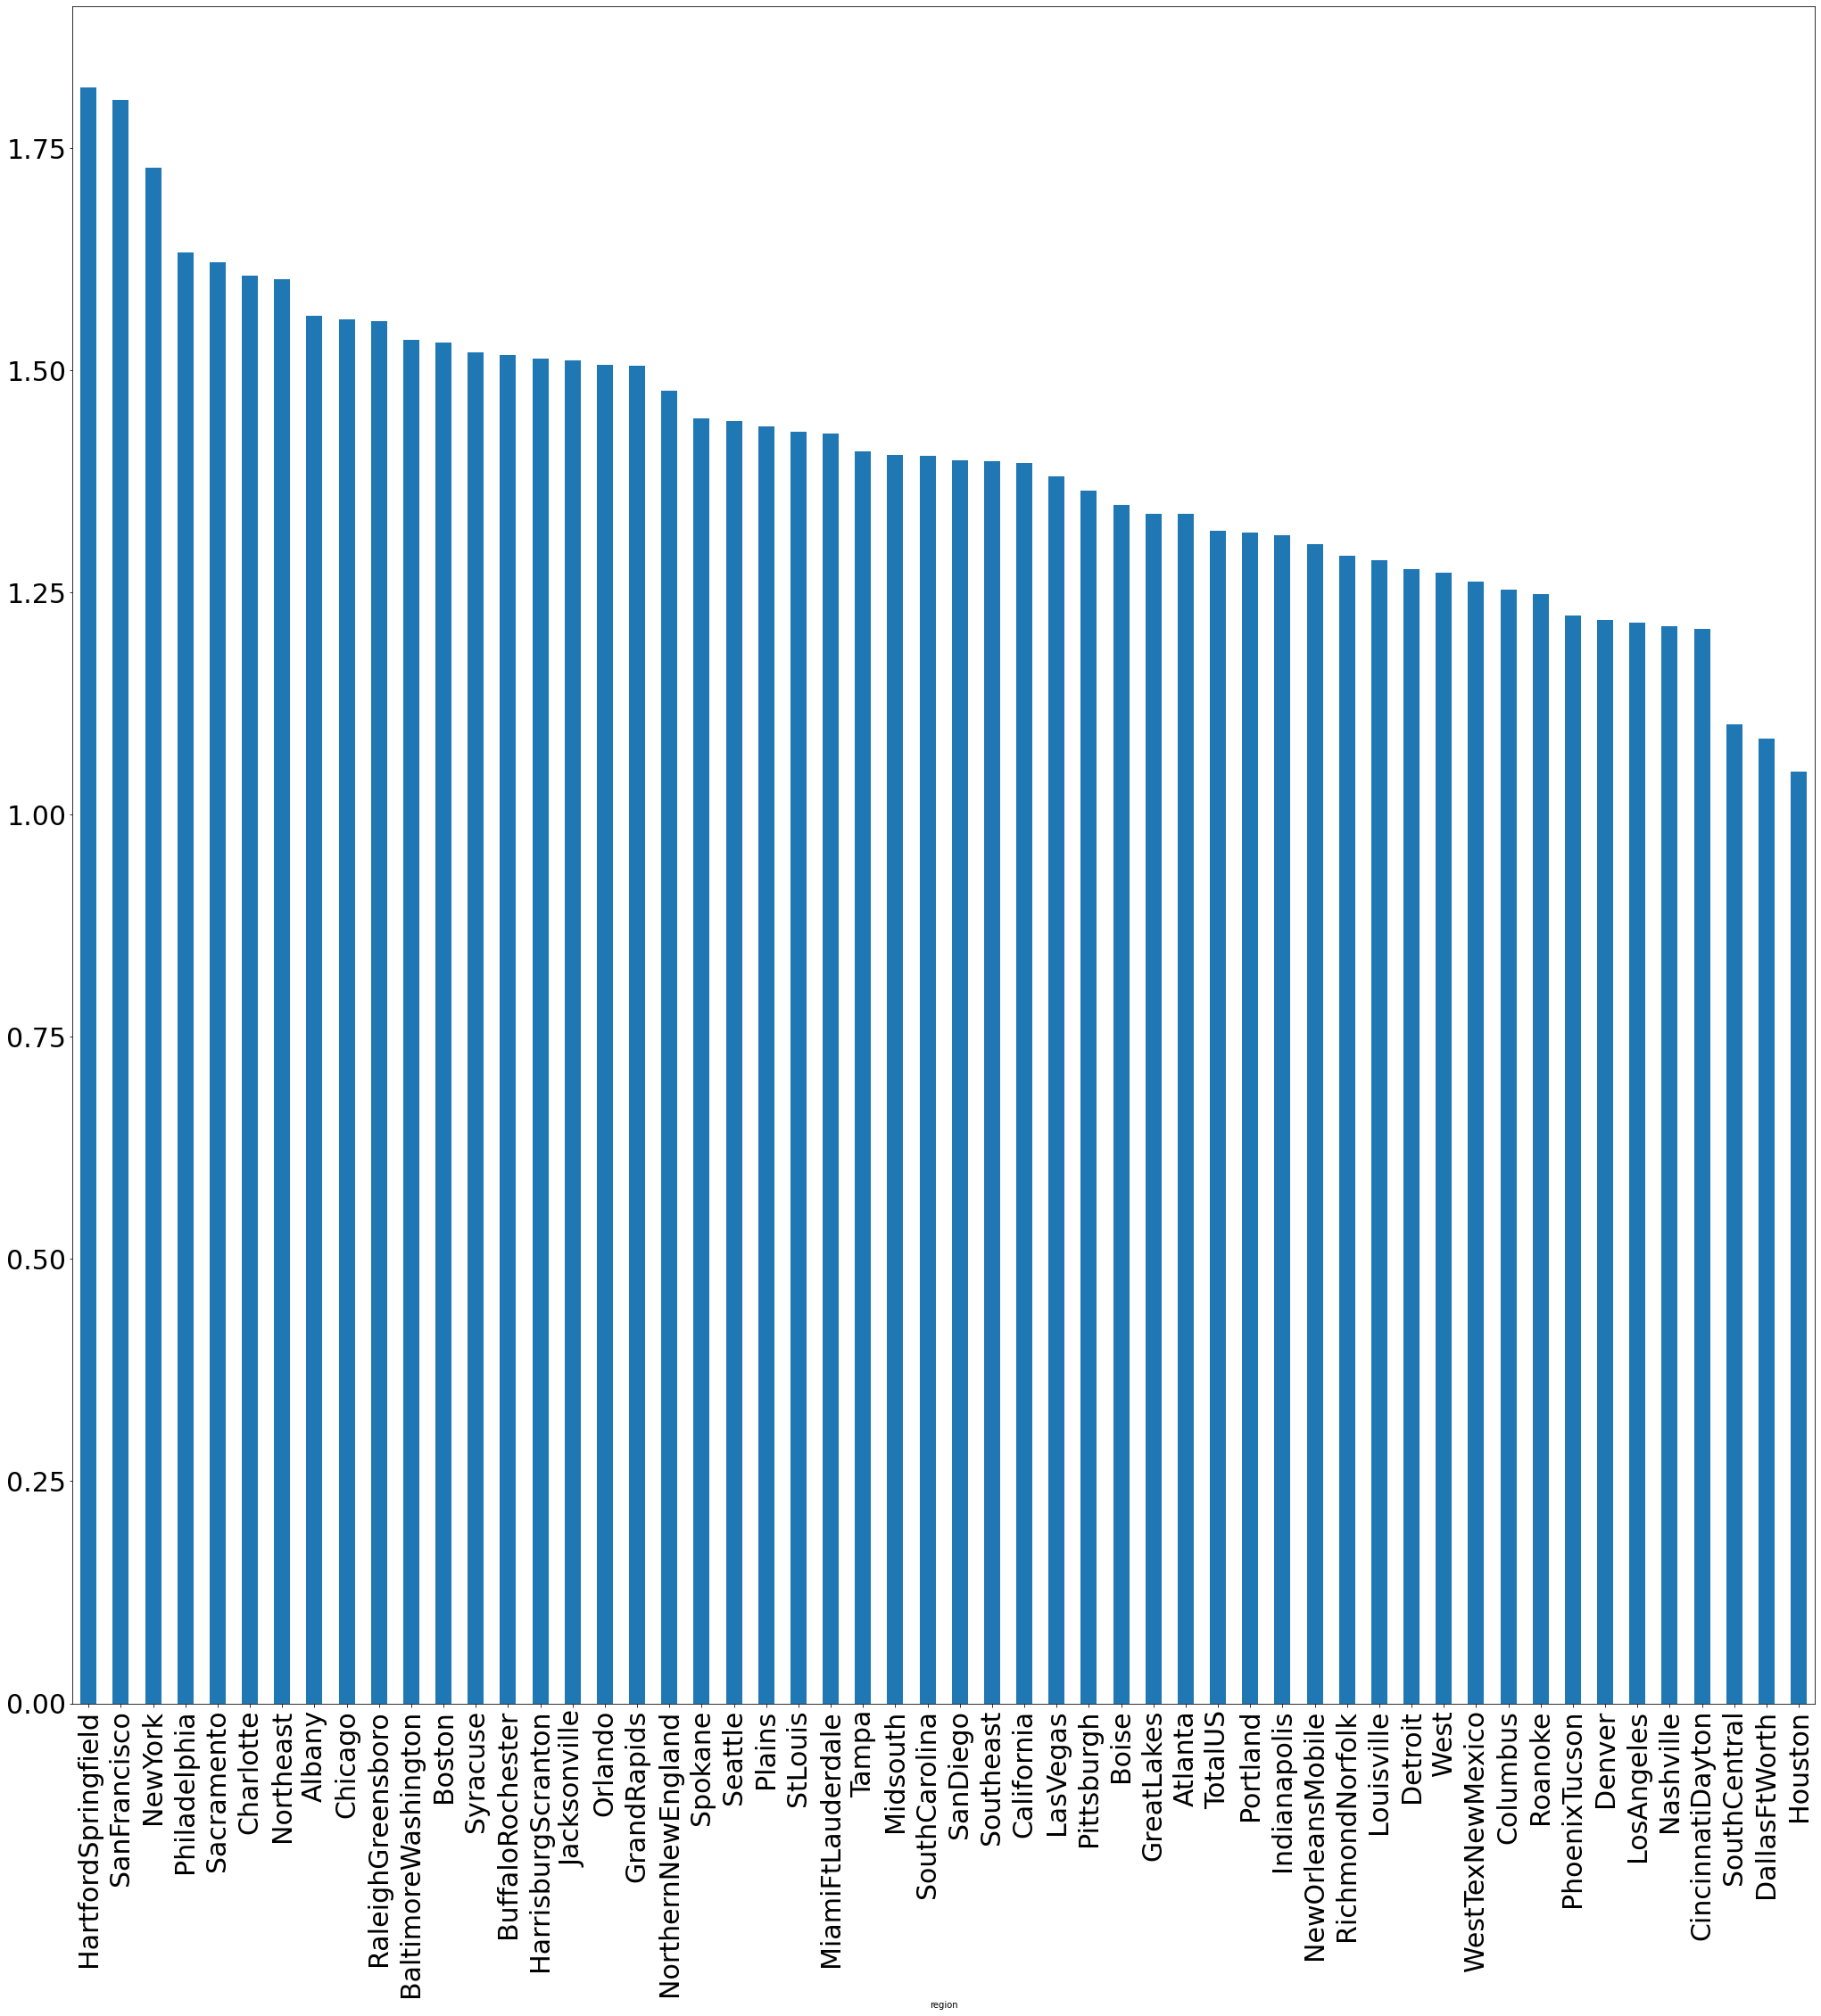

In [28]:
((dt.groupby('region')['AveragePrice'].mean()).sort_values(ascending=False)).plot(kind='bar', figsize=(35,35),fontsize=30)

<AxesSubplot:xlabel='region'>

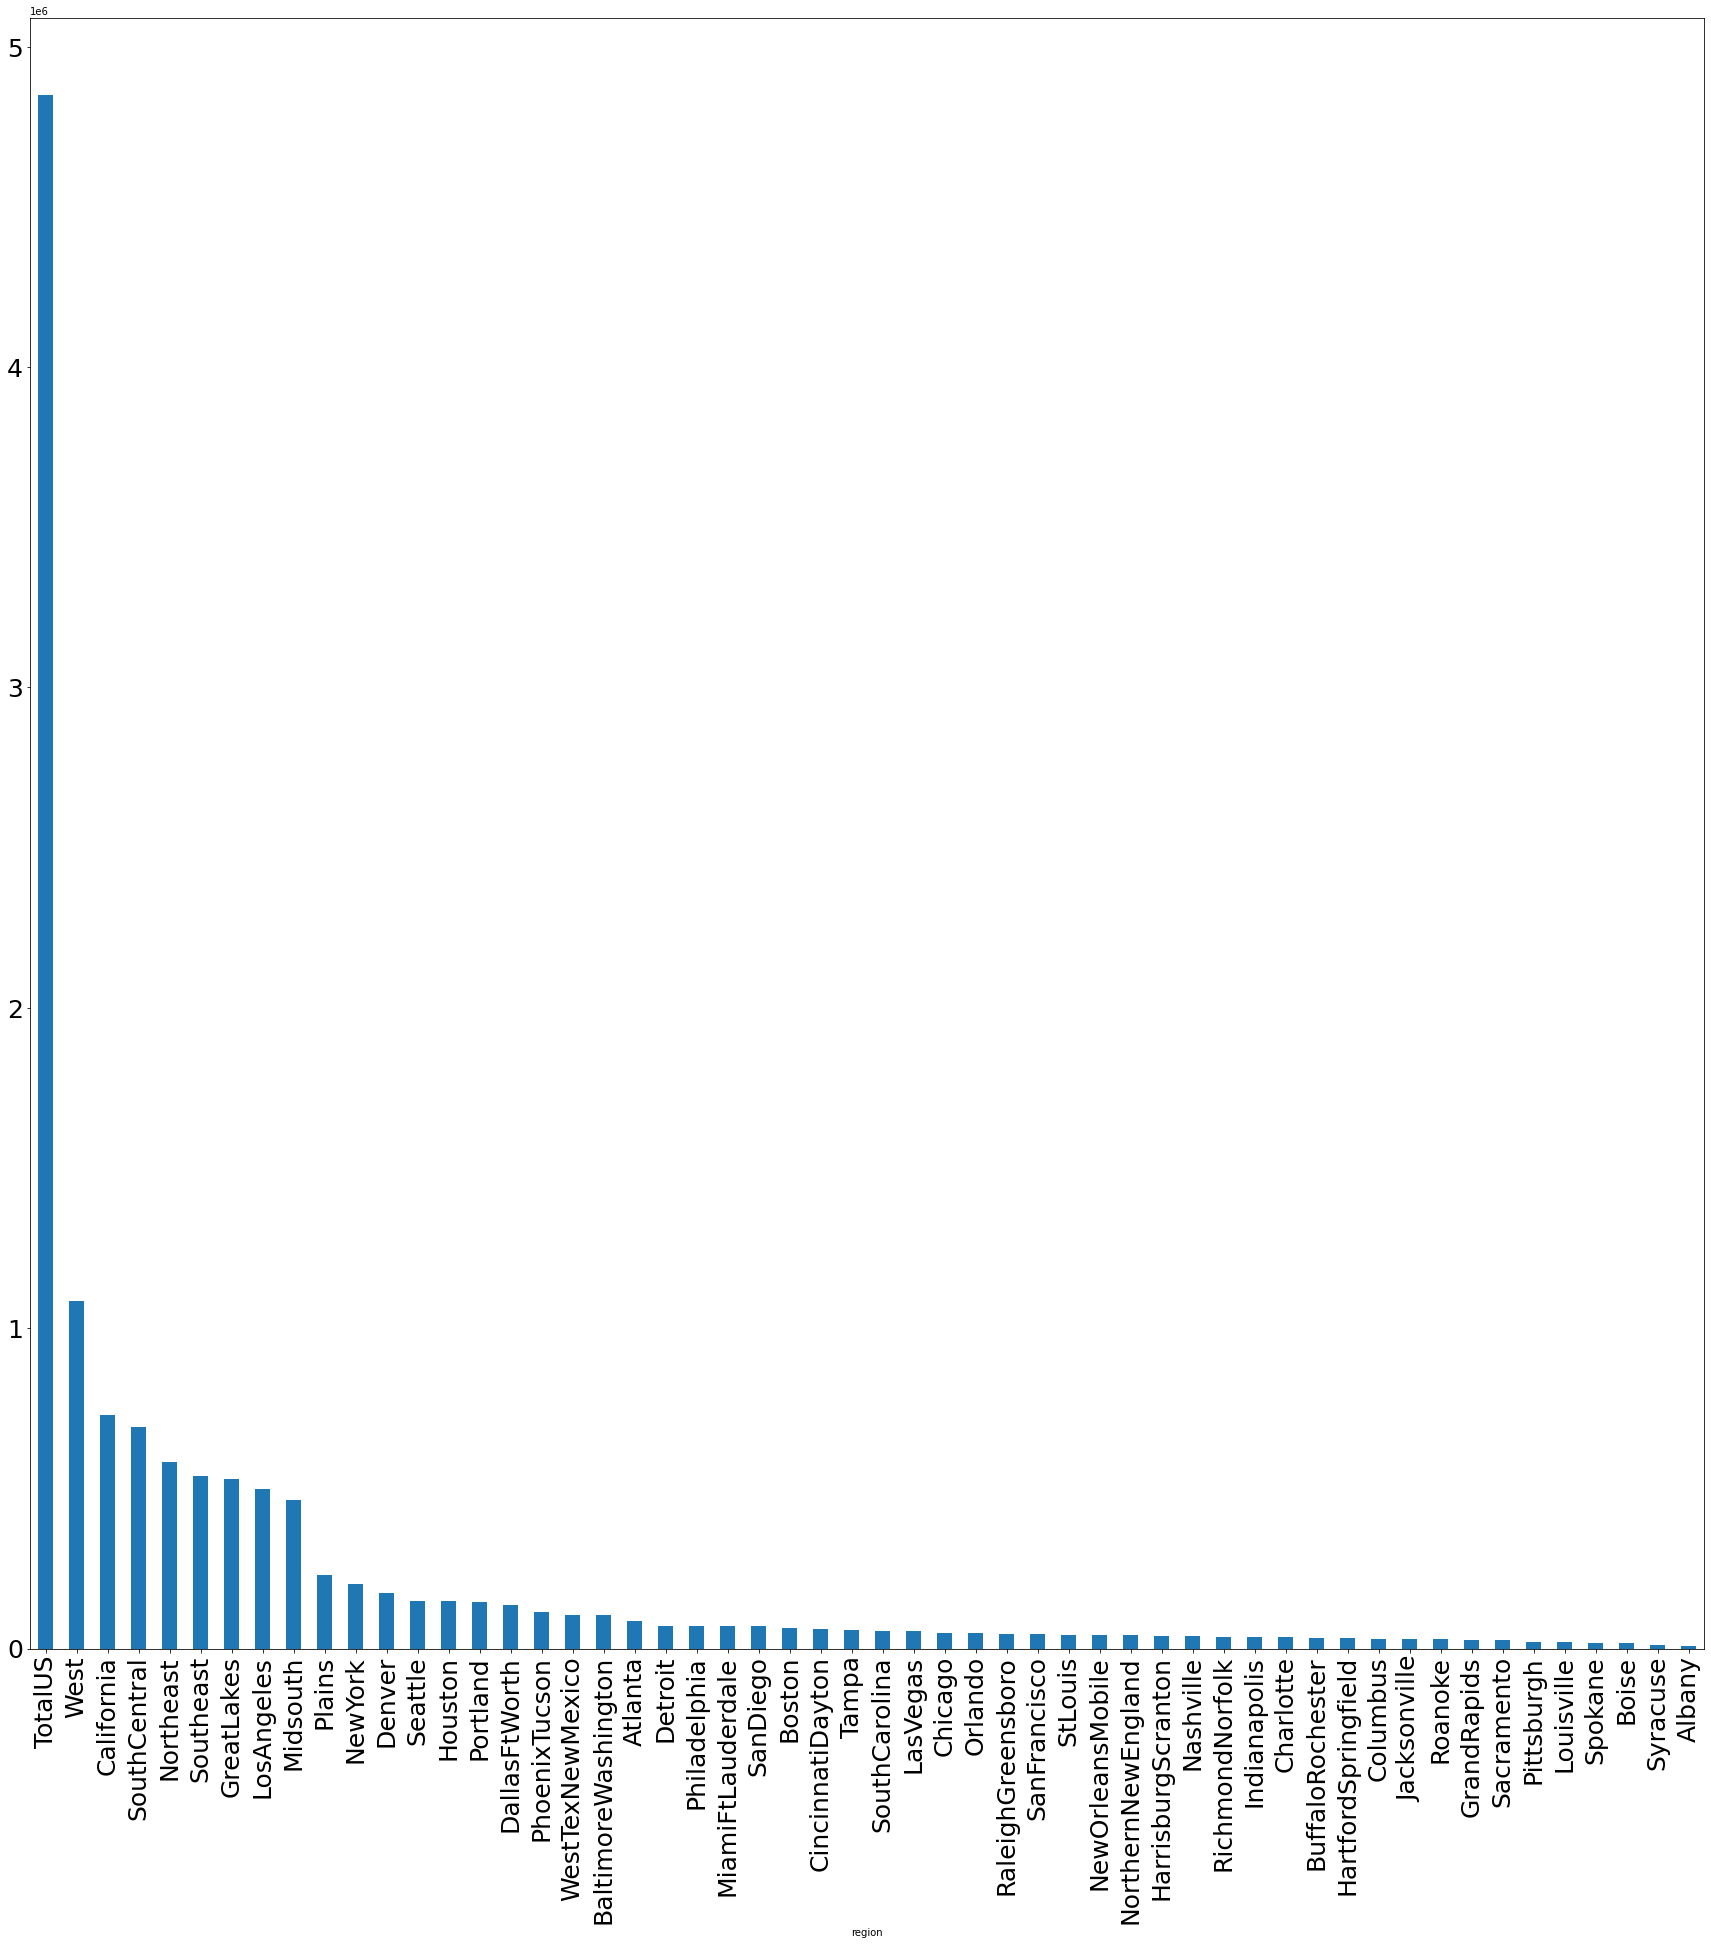

In [29]:
((dt.groupby('region')['Total Bags'].mean()).sort_values(ascending=False)).plot(kind='bar', figsize=(30,30),fontsize=25)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

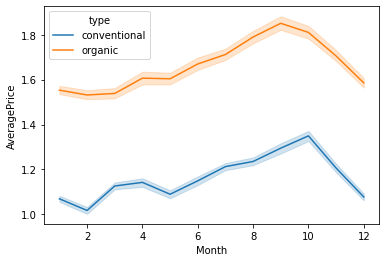

In [30]:
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=dt)

In [31]:
dt.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

In [4]:
dt.drop(columns=['Unnamed: 0','Small Bags','Large Bags'], inplace=True)

In [33]:
t=dt.corr()

<AxesSubplot:>

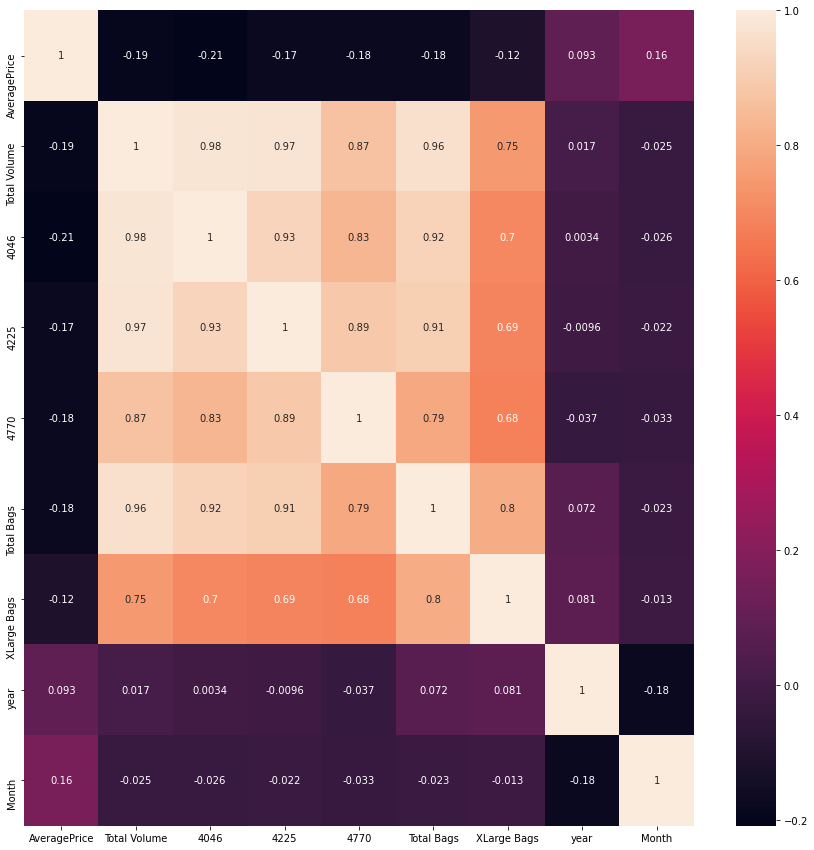

In [34]:
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(t,annot=True)

In [35]:
#Encoding

In [5]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [6]:
# Assigning to a variable
le=LabelEncoder()

In [7]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['type']=le.fit_transform(dt['type'])

In [8]:
dt

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,0.0,1,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,0.0,1,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,0.0,1,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,0.0,1,2018,WestTexNewMexico


In [40]:
(dt.groupby('region')['AveragePrice'].mean()).sort_values(ascending=False)

region
HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Philadelphia           1.632130
Sacramento             1.621568
Charlotte              1.606036
Northeast              1.601923
Albany                 1.561036
Chicago                1.556775
RaleighGreensboro      1.555118
BaltimoreWashington    1.534231
Boston                 1.530888
Syracuse               1.520325
BuffaloRochester       1.516834
HarrisburgScranton     1.513284
Jacksonville           1.510947
Orlando                1.506213
GrandRapids            1.505000
NorthernNewEngland     1.477396
Spokane                1.445592
Seattle                1.442574
Plains                 1.436509
StLouis                1.430621
MiamiFtLauderdale      1.428491
Tampa                  1.408846
Midsouth               1.404763
SouthCarolina          1.403284
SanDiego               1.398166
Southeast              1.398018
California             1.395325
LasVegas               1.380917
P

# Regression Problem

In [73]:
# Assignment of X and y
X=dt.drop(['region','AveragePrice'], axis=1)
y=dt.AveragePrice

In [74]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [25]:
# Applying machine learning models
# Importing machine learning libraries
# The problem is related regression the regression models are used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [44]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :-0.2901013089108435
At random state, 1, the testing accuracy is :0.4399518735908544


At random state, 2, the training accuracy is :-0.26557659791687893
At random state, 2, the testing accuracy is :0.42048390674055625


At random state, 3, the training accuracy is :-0.2822497250954801
At random state, 3, the testing accuracy is :0.4337487888697257


At random state, 4, the training accuracy is :-0.26852286385925694
At random state, 4, the testing accuracy is :0.42327740026614324


At random state, 5, the training accuracy is :-0.28920527765107673
At random state, 5, the testing accuracy is :0.4382330067555734


At random state, 6, the training accuracy is :-0.2926289160372406
At random state, 6, the testing accuracy is :0.441805430616515


At random state, 7, the training accuracy is :-0.28423417166535647
At random state, 7, the testing accuracy is :0.4353129020308464


At random state, 8, the training accuracy is :-0.2835979879670958
At ra

In [ ]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.9766846700467421
At random state, 1, the testing accuracy is :0.8624388097917854


At random state, 2, the training accuracy is :0.977159415015874
At random state, 2, the testing accuracy is :0.8434951046127864


At random state, 3, the training accuracy is :0.9771495399989341
At random state, 3, the testing accuracy is :0.853888711272315


At random state, 4, the training accuracy is :0.9770979433977643
At random state, 4, the testing accuracy is :0.8386780342800796


At random state, 5, the training accuracy is :0.9768582381082248
At random state, 5, the testing accuracy is :0.848189981036401


At random state, 6, the training accuracy is :0.9767420693996041
At random state, 6, the testing accuracy is :0.851092467428901


At random state, 7, the training accuracy is :0.9765169917073137
At random state, 7, the testing accuracy is :0.8563000366200523


At random state, 8, the training accuracy is :0.9769699207883754
At random state, 8, th

In [44]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :1.0
At random state, 1, the testing accuracy is :0.711231485437176


At random state 2, the training accuracy is :1.0
At random state, 2, the testing accuracy is :0.6820211916775705


At random state 3, the training accuracy is :1.0
At random state, 3, the testing accuracy is :0.7187597444200082


At random state 4, the training accuracy is :1.0
At random state, 4, the testing accuracy is :0.7082714683017248


At random state 5, the training accuracy is :1.0
At random state, 5, the testing accuracy is :0.6686624007812574


At random state 6, the training accuracy is :1.0
At random state, 6, the testing accuracy is :0.7019158340062157


At random state 7, the training accuracy is :1.0
At random state, 7, the testing accuracy is :0.7103169747407454


At random state 8, the training accuracy is :1.0
At random state, 8, the testing accuracy is :0.687109121423504


At random state 9, the training accuracy is :1.0
At random state, 9, the testing a

In [50]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9074886072521328
At random state, 1, the testing accuracy is :0.8354451033230242


At random state 2, the training accuracy is :0.9081918047415293
At random state, 2, the testing accuracy is :0.8147586514940146


At random state 3, the training accuracy is :0.911307490615421
At random state, 3, the testing accuracy is :0.8254078131379379


At random state 4, the training accuracy is :0.9143846025623504
At random state, 4, the testing accuracy is :0.8195170939860694


At random state 5, the training accuracy is :0.9140064499438054
At random state, 5, the testing accuracy is :0.8261959606824129


At random state 6, the training accuracy is :0.9144860898850251
At random state, 6, the testing accuracy is :0.825975507688083


At random state 7, the training accuracy is :0.9104797040317903
At random state, 7, the testing accuracy is :0.8249140981664613


At random state 8, the training accuracy is :0.9106557761806915
At random state, 8, the test

In [46]:
for i in range(1,200):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    predtrain=ad.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.16531534336749265
At random state, 1, the testing accuracy is :0.5352290677985212


At random state, 2, the training accuracy is :0.13618662030868967
At random state, 2, the testing accuracy is :0.5237069529037031


At random state, 3, the training accuracy is :0.17263296488436997
At random state, 3, the testing accuracy is :0.5279957152709237


At random state, 4, the training accuracy is :0.2046093928828686
At random state, 4, the testing accuracy is :0.532231961569782


At random state, 5, the training accuracy is :0.18398256486244624
At random state, 5, the testing accuracy is :0.5482683311449257


At random state, 6, the training accuracy is :0.13788855357581764
At random state, 6, the testing accuracy is :0.5444126361272313


At random state, 7, the training accuracy is :-0.027448865896649854
At random state, 7, the testing accuracy is :0.5169297470130321


At random state, 8, the training accuracy is :0.1334845015691275
At random s

In [76]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.8053269329647106
At random state, 1, the testing accuracy is :0.7529502552524088


At random state 2, the training accuracy is :0.8062190674727874
At random state, 2, the testing accuracy is :0.7440904347846631


At random state 3, the training accuracy is :0.8094239071726723
At random state, 3, the testing accuracy is :0.7408064102264856


At random state 4, the training accuracy is :0.8063720331430324
At random state, 4, the testing accuracy is :0.7331739192851412


At random state 5, the training accuracy is :0.8083124447449026
At random state, 5, the testing accuracy is :0.7425583988530553


At random state 6, the training accuracy is :0.803774039781187
At random state, 6, the testing accuracy is :0.7608782755773973


At random state 7, the training accuracy is :0.8059966216238464
At random state, 7, the testing accuracy is :0.7479873452317246


At random state 8, the training accuracy is :0.8071233092388171
At random state, 8, the tes

In [48]:
for i in range(1,200):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    sr=SVR()
    sr.fit(x_train, y_train)
    predtrain=sr.predict(x_train)
    predtest=sr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.19851896887678844
At random state, 1, the testing accuracy is :0.5807035276203314


At random state 2, the training accuracy is :0.2246379337754525
At random state, 2, the testing accuracy is :0.5471065901004022


At random state 3, the training accuracy is :0.21360095017747194
At random state, 3, the testing accuracy is :0.5647696228414463


At random state 4, the training accuracy is :0.22187437446224778
At random state, 4, the testing accuracy is :0.5565321193666581


At random state 5, the training accuracy is :0.19979880195362765
At random state, 5, the testing accuracy is :0.569439671163097


At random state 6, the training accuracy is :0.20974741180733558
At random state, 6, the testing accuracy is :0.5642518120682471


At random state 7, the training accuracy is :0.2072324261674635
At random state, 7, the testing accuracy is :0.5781614898186188


At random state 8, the training accuracy is :0.20113054916847384
At random state, 8, t

KeyboardInterrupt: 

In [50]:
# Importing PCA components
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X_scaled)

array([[-4.35647829e-01,  2.05115253e+00, -9.61056812e-01, ...,
         2.22326513e-02, -1.42223018e-02,  4.12176719e-07],
       [-4.39959384e-01,  2.05082484e+00, -9.61468979e-01, ...,
         1.80112904e-02, -1.96865695e-02,  4.08004043e-07],
       [-4.09960466e-01,  2.05288305e+00, -9.58527012e-01, ...,
         4.82290641e-02,  1.27493107e-02,  4.26198749e-07],
       ...,
       [-6.19966177e-01, -2.47701706e+00,  8.18318167e-01, ...,
        -3.09678466e-02,  5.20419304e-02, -1.89285588e-06],
       [-6.18706291e-01, -2.47703919e+00,  8.18471710e-01, ...,
        -3.03873801e-02,  5.12615719e-02, -1.89526531e-06],
       [-6.19704598e-01, -2.47727007e+00,  8.18359377e-01, ...,
        -3.05758724e-02,  5.18849695e-02, -1.89505291e-06]])

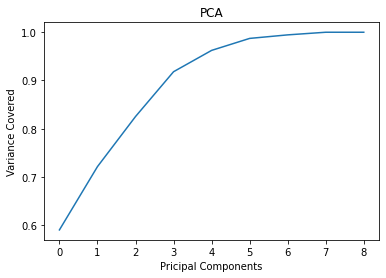

In [51]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [52]:
pca=PCA(n_components=7)
new_pcomp=pca.fit_transform(X_scaled)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [53]:
prin_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.435648,2.051153,-0.961057,-0.377218,0.128913,-0.037080,0.022233
1,-0.439959,2.050825,-0.961469,-0.377651,0.131703,-0.036853,0.018011
2,-0.409960,2.052883,-0.958527,-0.374973,0.113770,-0.038417,0.048229
3,-0.428830,2.051785,-0.960433,-0.376341,0.123911,-0.036331,0.029563
4,-0.438039,1.855599,-0.972475,-0.173922,0.148919,-0.042873,0.018386
...,...,...,...,...,...,...,...
18244,-0.624442,-2.282139,0.829036,-0.465275,-0.245039,0.118510,-0.031768
18245,-0.622321,-2.477284,0.818027,-0.261428,-0.228326,0.113002,-0.029731
18246,-0.619966,-2.477017,0.818318,-0.260888,-0.229413,0.118543,-0.030968
18247,-0.618706,-2.477039,0.818472,-0.260950,-0.229562,0.117689,-0.030387


In [54]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.781725801385083
At random state, 1, the testing accuracy is :0.7320939976225994


At random state 2, the training accuracy is :0.7842740086757977
At random state, 2, the testing accuracy is :0.72155422335623


At random state 3, the training accuracy is :0.7864772556184866
At random state, 3, the testing accuracy is :0.7166553433006234


At random state 4, the training accuracy is :0.7849255817083752
At random state, 4, the testing accuracy is :0.6952063349653808


At random state 5, the training accuracy is :0.7838785974783619
At random state, 5, the testing accuracy is :0.7232204545549904


At random state 6, the training accuracy is :0.7796534260691611
At random state, 6, the testing accuracy is :0.7404284115983342


At random state 7, the training accuracy is :0.7845871845651953
At random state, 7, the testing accuracy is :0.7193175267487883


At random state 8, the training accuracy is :0.7833404973945799
At random state, 8, the testi

In [55]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 0.14620657534246576
The MSE is 0.14620657534246576 and RMSE is 0.3823696841310327


In [56]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(x_test,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.8104967862995067
At random state, 1, the testing accuracy is :0.7297065097999196


At random state 2, the training accuracy is :0.8195401972587029
At random state, 2, the testing accuracy is :0.7087306904544266


At random state 3, the training accuracy is :0.8169242951776455
At random state, 3, the testing accuracy is :0.7182683015321242


At random state 4, the training accuracy is :0.8155389061303104
At random state, 4, the testing accuracy is :0.7084301636748347


At random state 5, the training accuracy is :0.809964684018747
At random state, 5, the testing accuracy is :0.7197379644359496


At random state 6, the training accuracy is :0.8062799799496267
At random state, 6, the testing accuracy is :0.7315445617734918


At random state 7, the training accuracy is :0.8168778466137337
At random state, 7, the testing accuracy is :0.722509266163062


At random state 8, the training accuracy is :0.8037929864383694
At random state, 8, the test

In [ ]:
# Calculating the MSE, RMSE and MAE for XGBoost Model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

In [80]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors' : range(5,10),
           'leaf_size': range(5,10),
           'n_jobs': range(2,10)}

In [81]:
c=GridSearchCV(KNeighborsRegressor(),param_grid=parameters)
c.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': range(5, 10), 'n_jobs': range(2, 10),
                         'n_neighbors': range(5, 10)})

In [82]:
c.best_params_

{'leaf_size': 5, 'n_jobs': 2, 'n_neighbors': 5}

In [93]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=278)
k=KNeighborsRegressor(leaf_size=5, n_jobs=3, n_neighbors=3)
k.fit(x_train, y_train)
predtrain=k.predict(x_train)
predtest=k.predict(x_test)
print(f"At random state 278 the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state 278 the testing accuracy is :{r2_score(y_test, predtest)}")

At random state 278 the training accuracy is :0.8788146304124475
At random state 278 the testing accuracy is :0.7880326033386221


In [ ]:
# Picking the file
import pickle
filename = 'Baseball Case Study'
outfile = open(filename,'wb')
pickle.dump(Baseball Case Study_dict,outfile)
outfile.close()

# Conclusion
The dataset considered for regression gives 78.803% accuracy using K-NN model.

# Classification Problem

In [16]:
dt

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,0.0,1,2018,53,1


In [10]:
 dt['region']=le.fit_transform(dt['region'])

In [11]:
dt

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,0.0,1,2018,53


In [17]:
# Assignment of X and y
X=dt.drop('region', axis=1)
y=dt.region

In [18]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [19]:
# Importing machine learning libraries
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [100]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,1000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train, y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.30575342465753425 random_state 1
accuracy of the optimum model 0.30575342465753425 random_state 1
accuracy of the model 0.30246575342465754 random_state 2
accuracy of the model 0.28876712328767123 random_state 3
accuracy of the model 0.29315068493150687 random_state 4
accuracy of the model 0.30082191780821915 random_state 5
accuracy of the model 0.283013698630137 random_state 6
accuracy of the model 0.2915068493150685 random_state 7
accuracy of the model 0.29753424657534244 random_state 8
accuracy of the model 0.30027397260273975 random_state 9
accuracy of the model 0.29232876712328765 random_state 10
accuracy of the model 0.29232876712328765 random_state 11
accuracy of the model 0.30082191780821915 random_state 12
accuracy of the model 0.30246575342465754 random_state 13
accuracy of the model 0.29534246575342465 random_state 14
accuracy of the model 0.2854794520547945 random_state 15
accuracy of the model 0.30054794520547945 random_state 16
accuracy of the mode

In [101]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.3202739726027397 in random state 420


In [102]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,1000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    dn=DecisionTreeClassifier()
    dn.fit(x_train, y_train)
    pred=dn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7742465753424658 random_state 1
accuracy of the optimum model 0.7742465753424658 random_state 1
accuracy of the model 0.7802739726027397 random_state 2
accuracy of the optimum model 0.7802739726027397 random_state 2
accuracy of the model 0.7671232876712328 random_state 3
accuracy of the model 0.7712328767123288 random_state 4
accuracy of the model 0.7613698630136986 random_state 5
accuracy of the model 0.7789041095890411 random_state 6
accuracy of the model 0.7761643835616439 random_state 7
accuracy of the model 0.7690410958904109 random_state 8
accuracy of the model 0.7780821917808219 random_state 9
accuracy of the model 0.7693150684931507 random_state 10
accuracy of the model 0.7728767123287671 random_state 11
accuracy of the model 0.7698630136986301 random_state 12
accuracy of the model 0.763013698630137 random_state 13
accuracy of the model 0.7704109589041096 random_state 14
accuracy of the model 0.7690410958904109 random_state 15
accuracy of the model 0.763

In [103]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.7956164383561644 in random state 127


In [20]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,500):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8827397260273973 random_state 1
accuracy of the optimum model 0.8827397260273973 random_state 1
accuracy of the model 0.8802739726027398 random_state 2
accuracy of the model 0.8810958904109589 random_state 3
accuracy of the model 0.8904109589041096 random_state 4
accuracy of the optimum model 0.8904109589041096 random_state 4
accuracy of the model 0.8873972602739726 random_state 5
accuracy of the model 0.8876712328767123 random_state 6
accuracy of the model 0.8794520547945206 random_state 7
accuracy of the model 0.8865753424657534 random_state 8
accuracy of the model 0.873972602739726 random_state 9
accuracy of the model 0.8827397260273973 random_state 10
accuracy of the model 0.8789041095890411 random_state 11
accuracy of the model 0.8895890410958904 random_state 12
accuracy of the model 0.8838356164383562 random_state 13
accuracy of the model 0.8893150684931507 random_state 14
accuracy of the model 0.8838356164383562 random_state 15
accuracy of the model 0.885

In [21]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8983561643835617 in random state 250


In [22]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    xg=XGBRFClassifier()
    xg.fit(x_train, y_train)
    pred=xg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

[05:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7219178082191781 random_state 1
accuracy of the optimum model 0.7219178082191781 random_state 1
[05:58:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7306849315068493 random_state 2
accuracy of the optimum model 0.7306849315068493 random_state 2
[06:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the defau

KeyboardInterrupt: 

In [23]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.7306849315068493 in random state 2


In [26]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,500):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    sv=SVC()
    sv.fit(x_train, y_train)
    pred=sv.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.2263013698630137 random_state 1
accuracy of the optimum model 0.2263013698630137 random_state 1
accuracy of the model 0.20383561643835615 random_state 2
accuracy of the model 0.21643835616438356 random_state 3
accuracy of the model 0.21863013698630138 random_state 4


KeyboardInterrupt: 

In [27]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.2263013698630137 in random state 1


In [28]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,500):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    ab=AdaBoostClassifier()
    ab.fit(x_train, y_train)
    pred=ab.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.061095890410958906 random_state 1
accuracy of the optimum model 0.061095890410958906 random_state 1
accuracy of the model 0.07260273972602739 random_state 2
accuracy of the optimum model 0.07260273972602739 random_state 2
accuracy of the model 0.06465753424657535 random_state 3
accuracy of the model 0.07424657534246576 random_state 4
accuracy of the optimum model 0.07424657534246576 random_state 4
accuracy of the model 0.06767123287671233 random_state 5
accuracy of the model 0.06438356164383562 random_state 6
accuracy of the model 0.07589041095890411 random_state 7
accuracy of the optimum model 0.07589041095890411 random_state 7
accuracy of the model 0.05835616438356164 random_state 8


KeyboardInterrupt: 

In [29]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.07589041095890411 in random state 7


In [31]:
# Gettting the best model
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=250)
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
acc

0.8964383561643836

In [33]:
#Ploting ROC and AUC curves
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,pred)
roc_auc=auc(fpr,tpr)

ValueError: multiclass format is not supported

In [ ]:
roc_auc

In [54]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params={'max_depth': [3, 5, 7, 10],
        'n_estimators' : [100, 200, 500],}

In [55]:
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(RandomForestClassifier(),param_grid=params)
g.fit(x_train,y_train)
print('The best parameters are ', g.best_params_)

The best parameters are  {'max_depth': 10, 'n_estimators': 500}


In [69]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=250)
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
acc

0.8956164383561643

In [70]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        76
           1       0.79      0.83      0.81        54
           2       0.99      0.96      0.97        75
           3       0.86      0.84      0.85        64
           4       0.94      0.98      0.96        63
           5       0.88      0.76      0.81        75
           6       0.95      0.98      0.97        60
           7       0.91      0.93      0.92        80
           8       1.00      0.93      0.96        81
           9       0.93      0.88      0.90        72
          10       0.85      0.82      0.84        62
          11       0.92      0.89      0.91        66
          12       0.82      0.90      0.86        61
          13       0.86      0.90      0.88        69
          14       0.88      0.84      0.86        68
          15       0.96      0.99      0.97        75
          16       0.98      0.95      0.97        64
          17       0.96    

In [ ]:
#pickling
import pickle
filename = 'Ava'
outfile = open(filename,'wb')
pickle.dump(Ava_dict,outfile)
outfile.close()

# Conclusion